<a href="https://colab.research.google.com/github/ProfAI/machine-learning-fondamenti/blob/main/4%20-%20Overfitting%20e%20Tecniche%20di%20Regolarizzazione/overfitting_regularizzazion_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regolarizzazione: Esercitazione
Per questa esercitazione dovrai verificare la presenza di overfitting e regolarizzare un modello di regressione polinomiale di secondo grado. Il modello utilizzerà il Boston Housing Dataset, che puoi scaricare [da qui](https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/housing_dirty.csv), per stimare il valore di abitazioni.

Il modello dovrà avere:
1. Un R2 sul set di test di almeno 0.75.
2. Un R2 calcolato tramite cross validation di almeno 0.8.

Inoltre, la differenza tra R2 sul set di addestramento e sul set di test deve essere inferiore del 15% (ad esempio, per un R2 sul set di addestramento di 1, l'R2 sul set di test non deve essere inferiore a 0.85).



In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [152]:
RANDOM_SEED = 0

In [153]:
BASE_URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/"
df = pd.read_csv(BASE_URL+"housing.csv", index_col=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [154]:
X = df.drop("PRICE", axis=1).values
y = df["PRICE"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


In [155]:
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [156]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [157]:
def evaluate_model(model, dataset):

  X, y = dataset

  y_pred = model.predict(X)

  print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.3f}")
  print(f"R2: {r2_score(y, y_pred):.3f}")

In [158]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Train set")
evaluate_model(lr, (X_train, y_train))

print("Test set")
evaluate_model(lr, (X_test, y_test))

Train set
RMSE: 2.016
R2: 0.952
Test set
RMSE: 5.675
R2: 0.606


In [160]:
model = Ridge(alpha=10.)
model.fit(X_train, y_train)

print("Train set")
evaluate_model(model, (X_train, y_train))

print("Test set")
evaluate_model(model, (X_test, y_test))

Train set
RMSE: 2.935
R2: 0.899
Test set
RMSE: 4.371
R2: 0.766


In [161]:
model = Lasso(alpha=.1)
model.fit(X_train, y_train)

print("Train set")
evaluate_model(model, (X_train, y_train))

print("Test set")
evaluate_model(model, (X_test, y_test))

Train set
RMSE: 3.440
R2: 0.861
Test set
RMSE: 4.636
R2: 0.737


In [162]:
train_score = []
test_score = []

kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

for train_index, test_index in kf.split(X):
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  poly = PolynomialFeatures(degree=2)
  X_train = poly.fit_transform(X_train)
  X_test = poly.transform(X_test)

  ss = StandardScaler()
  X_train = ss.fit_transform(X_train)
  X_test = ss.transform(X_test)

  model = Ridge(alpha=1.)
  model.fit(X_train, y_train)

  r2_train = r2_score(y_train, model.predict(X_train))
  train_score.append(r2_train)

  r2_test = r2_score(y_test, model.predict(X_test))
  test_score.append(r2_test)

scores = {
      "train_score":np.array(train_score),
      "test_score":np.array(test_score)
    }

scores

{'test_score': array([0.7418724 , 0.88884062, 0.81889018, 0.86812961, 0.9027071 ]),
 'train_score': array([0.92993095, 0.91058923, 0.9161008 , 0.91387122, 0.90079737])}

In [163]:
scores["train_score"].mean()

0.9142579148087027

In [164]:
scores["test_score"].mean()

0.8440879821235697

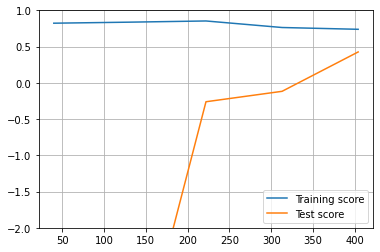

In [178]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

train_sizes_abs, train_scores, test_scores = learning_curve(Ridge(alpha=10.), X, y, random_state=RANDOM_SEED)

plt.plot(train_sizes_abs, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes_abs, test_scores.mean(axis=1), label="Test score")
plt.ylim([-2,1])
plt.legend(loc='lower right')
plt.grid()
plt.show()